In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from geopy.geocoders import Nominatim
from geopy import distance
from geopy.distance import geodesic
import census
import pandas as pd
import geopandas as gpd
import censusdata
import censusgeocode as cg
import geopy
from geopy.geocoders import Nominatim
import numpy as np
import plotly_express as px
import matplotlib.pyplot as plt
import requests

In [1]:
!pip install census
!pip install censusdata
!pip install censusgeocode
!pip install geopy
!pip install geopandas
!pip install plotly_express

In [21]:
comp = pd.read_excel('TennesseecompDF.xlsx')
comp = comp.drop(columns=['Unnamed: 0','NumOfKohl'])
comp

,Tract,County,Store,TotalVists,TotalNumOfCompetitors,TotalCompetitorVisits
0,100200,63,Kohls,588026,1,588026
1,21002,165,Kohls,503988,1,503988
2,40908,149,Kohls,462298,1,462298
3,4404,93,Kohls,445887,1,445887
4,5813,93,Kohls,418345,1,418345
...,...,...,...,...,...,...
114,920500,55,The Home Depot,455324,1,455324
115,40601,167,The Home Depot,402551,1,402551
116,960402,51,The Home Depot,388492,1,388492
117,970600,31,The Home Depot,357006,1,357006


In [22]:
newDF = pd.DataFrame()
for a in range(0,len(comp)):
    county = comp.County[a]
    countyDF = comp[comp['County'] == county]
    countyDF.reset_index(inplace=True, drop=True)
    
    for b in range(0, len(countyDF)):
        tract = countyDF.Tract[b]
        tractDF = countyDF[countyDF['Tract'] == tract]
        tractDF.reset_index(inplace=True, drop=True)
       
       
        NumOfKohl = 0
        NumOfLowe = 0
      
        NumOfHomeDepot = 0
        
        VisitsOfKohl = 0
        VisitsOfLowe = 0
      
        VisitsOfHomeDepot = 0
        
        
        for i,j in tractDF.iterrows():
                
        
          
                
            if (j['Store'] == 'Kohls'):
                NumOfKohl = NumOfKohl + 1
                VisitsOfKohl = j['TotalVists']
                
            if (j['Store'] == 'Lowes'):
                NumOfLowe = NumOfLowe + 1
                VisitsOfLowe = j['TotalVists']
            
                
            if (j['Store'] == 'The Home Depot'):
                NumOfHomeDepot = NumOfHomeDepot + 1
                VisitsOfHomeDepot = j['TotalVists']
            
        
                
        data = {
                'Tract' : tract,
                'County'  : county,
                'TotalNumOfCompetitors' : tractDF.iloc[0]['TotalNumOfCompetitors'],
                'TotalCompetitorVisits' : tractDF.iloc[0]['TotalCompetitorVisits'],
               
                'NumOfKohl' : NumOfKohl,
                'NumOfLowe' : NumOfLowe,
               
                'NumOfHomeDepot' : NumOfHomeDepot,
                
                'VisitsOfKohl' : VisitsOfKohl,
                'VisitsOfLowe' : VisitsOfLowe,
              
                'VisitsOfHomeDepot' : VisitsOfHomeDepot
                
               }
        data = pd.DataFrame(data, index=[0])
        newDF = pd.concat([newDF, data])

newDF.reset_index(inplace=True, drop=True)
newDF.drop_duplicates(subset=None, keep="first", inplace=True)

In [23]:
census = pd.read_excel('Tennessee Census Data.xlsx')
census

,Tract,County,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,Age15PopulationNeverMarried,Age15PopulationMarried
0,19004,37,226,991,536,191,109,9,991,689,502,1380,1481
1,19007,37,212,430,478,167,71,9,430,441,419,684,715
2,19008,37,411,1461,554,162,143,86,1461,1015,811,1890,1879
3,19105,37,313,1231,940,415,161,112,1231,1152,823,1678,1931
4,19106,37,336,988,903,327,346,82,988,797,358,1602,1362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,80103,147,614,1990,504,778,225,188,1990,1033,1157,1100,3250
1697,80104,147,498,2436,465,515,449,218,2436,1040,1952,1112,4010
1698,80200,147,486,1630,453,237,498,71,1630,520,1330,1057,2950
1699,80301,147,118,680,245,146,105,11,680,318,414,601,1162


In [24]:
rent =  pd.read_excel('TennesseePropertyTractAverageRent.xlsx')

In [25]:
censusRent = census.merge(
    rent,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)
censusRent
censusRent = censusRent.drop(columns=['Unnamed: 0'])

In [26]:
mar = pd.read_excel('marshalls-tennessee.xlsx')
mar

,Rank,Name,TotalVisits,lat,lng
0,1,"Marshalls / 11455 Parkside Dr, Knoxville, TN, ...",667805,35.900369,-84.165043
1,2,"Marshalls / 454 Pinnacle Pkwy, Bristol, TN, Un...",603255,36.594283,-82.261203
2,3,"Marshalls / Clinton Highway, Knoxville, Tennes...",561367,36.005602,-84.021291
3,4,"Marshalls / 202 Thorton Dr, Dickson, TN, Unite...",498539,36.064649,-87.382143
4,5,"Marshalls / 3062 Teaster Ln, Pigeon Forge, TN,...",482572,35.794759,-83.557931
5,6,"Marshalls / 1081 Vann Dr, Ste 108, Jackson, TN...",429958,35.668319,-88.860812
6,7,"Marshalls / 9125 Poplar Ave, Germantown, TN, U...",425903,35.066927,-89.758686
7,8,"Marshalls / 2040 Hamilton Place Blvd, Ste 300,...",404148,35.030606,-85.160383
8,9,"Marshalls / 2300 Madison St, Clarksville, TN, ...",380377,36.506352,-87.272120
9,10,"Marshalls / 1697 N Germantown Pkwy, Cordova, T...",376821,35.171726,-89.795375


In [27]:
marDF = pd.DataFrame()
j = 0
for i in  list(range(0,len(mar))):
    print(i)
    try:
        CensusGeoData1 = cg.coordinates(x=mar.lng[i], y= mar.lat[i])
        
    except:
        pass
    
    else:
        marDF.loc[j, 'Tract']  = CensusGeoData1 ['Census Tracts'][0]['TRACT']
        marDF.loc[j,'County'] = CensusGeoData1 ['Census Tracts'][0]['COUNTY']
        marDF.loc[j,'TotalVisits'] = mar.TotalVisits[i]
        j = j + 1
    
marDF.head()        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


,Tract,County,TotalVisits
0,005803,093,667805.0
1,042400,163,603255.0
2,004800,093,561367.0
3,060602,043,498539.0
4,081001,155,482572.0


In [28]:
marDF['Tract'] = marDF['Tract'].astype(int)
marDF['County'] = marDF['County'].astype(int)

In [29]:
censusRentStore = marDF.merge(
    censusRent,
    "inner",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)
censusRentStore['AvgRent'] = censusRentStore['AvgRent'] .fillna(0)
censusRentStore

,Tract,County,TotalVisits,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,Age15PopulationNeverMarried,Age15PopulationMarried,AvgRent
0,5803,93,667805.0,332,895,404,120,252,99,895,236,899,806,1617,0.000000
1,42400,163,603255.0,235,885,657,238,147,44,885,313,847,663,1713,0.000000
2,4800,93,561367.0,367,1409,579,263,262,46,1409,810,1262,1207,2164,871.000000
3,60602,43,498539.0,298,1569,1021,270,269,75,1569,1151,1219,1979,2398,0.000000
4,81001,155,482572.0,190,867,334,218,225,0,867,264,790,929,1496,0.000000
5,1605,113,429958.0,222,542,403,157,33,48,542,286,347,1730,823,0.000000
6,21341,157,425903.0,349,1371,743,114,273,373,1371,606,1695,860,2680,0.000000
7,11446,65,404148.0,274,1361,684,310,323,88,1361,538,1081,1315,2043,1197.333333
8,101805,125,380377.0,137,1006,379,239,441,107,1006,762,576,398,1679,0.000000
9,21126,157,376821.0,190,1190,847,387,283,33,1190,861,944,1188,1959,1279.500000


In [30]:
trainData = censusRentStore.merge(
    newDF,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

trainData = trainData.fillna(0)
trainData = trainData.drop(columns=['Tract','County'])
trainData

,TotalVisits,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,...,Age15PopulationMarried,AvgRent,TotalNumOfCompetitors,TotalCompetitorVisits,NumOfKohl,NumOfLowe,NumOfHomeDepot,VisitsOfKohl,VisitsOfLowe,VisitsOfHomeDepot
0,667805.0,332,895,404,120,252,99,895,236,899,...,1617,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,603255.0,235,885,657,238,147,44,885,313,847,...,1713,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,561367.0,367,1409,579,263,262,46,1409,810,1262,...,2164,871.000000,2.0,1882683.0,0.0,1.0,1.0,0.0,944085.0,938598.0
3,498539.0,298,1569,1021,270,269,75,1569,1151,1219,...,2398,0.000000,1.0,1074574.0,0.0,1.0,0.0,0.0,1074574.0,0.0
4,482572.0,190,867,334,218,225,0,867,264,790,...,1496,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,429958.0,222,542,403,157,33,48,542,286,347,...,823,0.000000,2.0,946379.0,1.0,0.0,1.0,409556.0,0.0,536823.0
6,425903.0,349,1371,743,114,273,373,1371,606,1695,...,2680,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,404148.0,274,1361,684,310,323,88,1361,538,1081,...,2043,1197.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,380377.0,137,1006,379,239,441,107,1006,762,576,...,1679,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,376821.0,190,1190,847,387,283,33,1190,861,944,...,1959,1279.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
cols = ['TotalFemale40to49','NumOfKohl','NumOfLowe',
       'FamilyHouseholds','NonFamilyHouseholds','TotalNumOfCompetitors', 
       'NumOfHomeDepot','VisitsOfLowe', 'VisitsOfKohl',
       'NumberOfHouseholdIncomeLessThan100000',
       'NumberOfHouseholdIncomeLessThan150000',
       'NumberOfHouseholdIncomeLessThan200000',
        'NumofEarnersInFamily',
        'Population30to39',  'TotalCompetitorVisits',
        'PopulationAbove60',
       'VisitsOfHomeDepot']

cols_str = " + ".join(cols)
mod = smf.ols(formula=f"TotalVisits ~ {cols_str}", data=trainData)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:            TotalVisits   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                 -0.673
Method:                 Least Squares   F-statistic:                    0.4252
Date:                Thu, 17 Nov 2022   Prob (F-statistic):              0.912
Time:                        02:20:34   Log-Likelihood:                -268.29
No. Observations:                  21   AIC:                             566.6
Df Residuals:                       6   BIC:                             582.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [32]:
#Test data 
censusTest = pd.read_excel('Tennessee Census Data.xlsx')

censusTestRent = censusTest.merge(
    rent,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

censusTestRent = censusTestRent.drop(columns=['Unnamed: 0'])

testData = censusTestRent.merge(
    newDF,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

testData = testData.fillna(0)
censusRentStoreCopy = censusRentStore
testData = testData[~testData.County.isin(censusRentStoreCopy['County'])]
tractCountyDF = testData[['Tract','County']]
testData = testData.drop(columns=['Tract','County'])
data = testData
testData

,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,Age15PopulationNeverMarried,Age15PopulationMarried,AvgRent,TotalNumOfCompetitors,TotalCompetitorVisits,NumOfKohl,NumOfLowe,NumOfHomeDepot,VisitsOfKohl,VisitsOfLowe,VisitsOfHomeDepot
27,130,476,241,65,62,41,476,110,546,254,927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,98,591,296,93,18,36,591,243,542,564,925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,75,541,427,54,37,5,541,193,915,366,992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,146,510,199,63,103,21,510,149,601,375,794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,228,1078,278,148,160,18,1078,461,1171,550,1882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,614,1990,504,778,225,188,1990,1033,1157,1100,3250,1324.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,498,2436,465,515,449,218,2436,1040,1952,1112,4010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1698,486,1630,453,237,498,71,1630,520,1330,1057,2950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1699,118,680,245,146,105,11,680,318,414,601,1162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [34]:
X, y = trainData.iloc[:,1:],trainData.iloc[:,0]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Training score:  0.9999999999997284


/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


RMSE: 73233.53


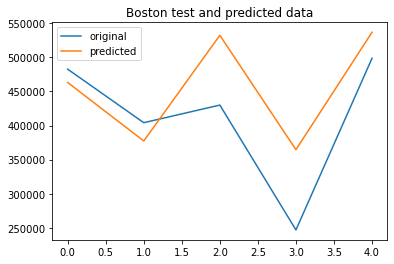

[463082.88 377357.28 532168.4  364581.06 536678.4 ]


In [36]:
from sklearn.model_selection import cross_val_score, KFold
xgbr = xgb.XGBRegressor(verbosity=0) 

xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)
scores = cross_val_score(xgbr, X_train, y_train,cv=10)

ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("RMSE: %.2f" % (mse**(1/2.0)))

preds = xgbr.predict(testData)

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.legend()
plt.show()

print(ypred)

In [37]:
predDF = pd.DataFrame(preds)
predDF.columns = ['Score']
predDF.reset_index(inplace=True, drop=True)
data.reset_index(inplace=True, drop=True)
tractCountyDF.reset_index(inplace=True, drop=True)

In [38]:
for i in list(range(0,len(data))):
    data.loc[i,'Prediction'] =  predDF.loc[i,'Score']
    data.loc[i, 'Tract'] = tractCountyDF.loc[i,'Tract']
    data.loc[i, 'County'] = tractCountyDF.loc[i,'County']
    
    

In [39]:
data.to_excel('Tennessee Marshalls Prediction.xlsx')